### Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Đọc dữ liệu

In [2]:
path = r"D:\Research_ICNlab\Time-series\Data\farm1_data.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(10)

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,20120401 01:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,20120401 02:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,20120401 03:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,20120401 04:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,20120401 05:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987
5,1,20120401 06:00,0.036996,0.099045,94676.9375,72.374039,0.641353,1.333368,-1.728431,292.077148,11815767.0,7558415.0,14198503.0,0.003960,0.057244
6,1,20120401 07:00,0.080911,0.121323,94708.0625,81.798737,0.753142,1.457923,-1.034620,291.069336,12274591.0,8798617.0,14925342.0,0.004970,0.088718
7,1,20120401 08:00,0.036159,0.139069,94748.8125,87.854065,0.788338,2.374826,-1.089040,289.073486,12351290.0,10041167.0,15112951.0,0.006477,0.030064
8,1,20120401 09:00,0.036372,0.072609,94785.8125,88.793488,0.502275,1.985531,-0.963010,288.031250,12351290.0,11257316.0,15112951.0,0.006725,0.000128
9,1,20120401 10:00,0.014353,0.035797,94817.7500,90.450668,0.501918,1.999518,-0.930320,287.405762,12351290.0,12460132.0,15112951.0,0.006745,0.000000


### Chuyển đổi cột TIMESTAMP sang dạng ngày, tháng, năm, giờ, phút

In [5]:
import datetime
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'],format='%Y%m%d %H:%M')
data.set_index(["TIMESTAMP"], inplace= True)

In [6]:
data.drop('ZONEID', axis =1, inplace = True)

In [7]:
data.head()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
TIMESTAMP,,,,,,,,,,,,,
2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


### EDA

In [8]:
df = data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19704 entries, 2012-04-01 01:00:00 to 2014-07-01 00:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VAR78   19704 non-null  float64
 1   VAR79   19704 non-null  float64
 2   VAR134  19704 non-null  float64
 3   VAR157  19704 non-null  float64
 4   VAR164  19704 non-null  float64
 5   VAR165  19704 non-null  float64
 6   VAR166  19704 non-null  float64
 7   VAR167  19704 non-null  float64
 8   VAR169  19704 non-null  float64
 9   VAR175  19704 non-null  float64
 10  VAR178  19704 non-null  float64
 11  VAR228  19704 non-null  float64
 12  POWER   19704 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB


In [10]:
df.columns

Index(['VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165', 'VAR166',
       'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228', 'POWER'],
      dtype='object')

In [11]:
df.describe()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
count,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,1.970400e+04,1.970400e+04,1.970400e+04,19704.000000,19704.000000
mean,0.039979,0.016466,94728.857310,68.458167,0.433079,0.854414,-0.331767,285.724220,1.230162e+07,1.394561e+07,1.435812e+07,0.000977,0.169321
std,0.117575,0.051613,603.340900,20.056606,0.401259,2.792177,1.876658,7.128859,6.660757e+06,7.789642e+06,7.074539e+06,0.003358,0.258784
min,0.000000,0.000000,92582.125000,6.348233,0.000000,-8.908603,-7.636124,270.266357,1.488887e+05,8.659728e+05,6.577261e+05,0.000000,0.000000
25%,0.000000,0.000000,94334.953125,53.740662,0.010712,-1.042297,-1.526728,280.390198,7.318301e+06,7.383988e+06,9.236506e+06,0.000000,0.000000
50%,0.002682,0.000098,94739.468750,71.707939,0.340118,0.630157,-0.500415,284.986450,1.100410e+07,1.382263e+07,1.310932e+07,0.000000,0.002564
75%,0.032245,0.006822,95150.312500,85.637417,0.885901,2.481762,0.839595,290.315979,1.727397e+07,2.016933e+07,1.976043e+07,0.000222,0.273317
max,3.184086,0.749807,96317.125000,101.790909,1.000007,13.056718,8.979910,310.458496,3.435448e+07,3.467366e+07,3.720136e+07,0.047260,0.916154


In [12]:
df.isnull().sum()

VAR78     0
VAR79     0
VAR134    0
VAR157    0
VAR164    0
VAR165    0
VAR166    0
VAR167    0
VAR169    0
VAR175    0
VAR178    0
VAR228    0
POWER     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
features = ['VAR78', 'VAR79', 'VAR134', 'VAR157', 'VAR164', 'VAR165', 'VAR166', 'VAR167', 'VAR169', 'VAR175', 'VAR178', 'VAR228']
target = 'POWER'

In [15]:
df.head()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
TIMESTAMP,,,,,,,,,,,,,
2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\1565607543.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_i = sns.histplot(df, x = features[i], palette = "Blues", bins=20, alpha=0.5 ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\1565607543.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_i = sns.histplot(df, x = features[i], palette = "Blues", bins=20, alpha=0.5 ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\1565607543.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_i = sns.histplot(df, x = features[i], palette = "Blues", bins=20, alpha=0.5 ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\1565607543.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax_i = sns.histplot(df, x = features[i], palette = "Blues", bins=20, alpha=0.5 ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\15

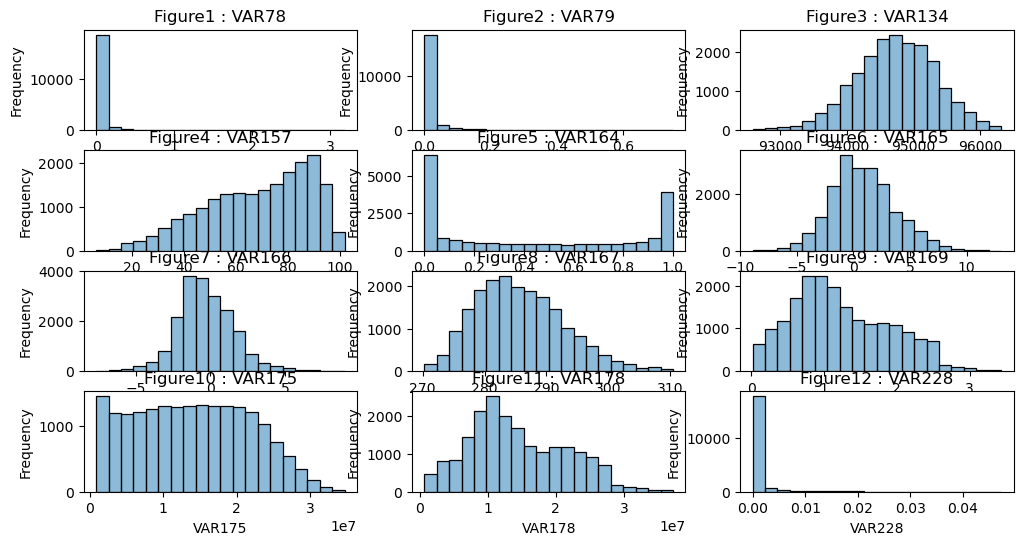

In [16]:
n_rows = 4
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (12,6))
for r in range(n_rows):
    for c in range(n_cols) :
        i = r*n_cols + c
        if i < len(features) :
            ax_i = ax[r,c]
            ax_i = sns.histplot(df, x = features[i], palette = "Blues", bins=20, alpha=0.5 ,ax = ax_i)
            ax_i.set_title(f"Figure{i+1} : {features[i]}")
            ax_i.set_ylabel('Frequency')
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\3930645477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_i = sns.boxplot(df, x = features[i], palette = "Blues" ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\3930645477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_i = sns.boxplot(df, x = features[i], palette = "Blues" ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\ipykernel_41400\3930645477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_i = sns.boxplot(df, x = features[i], palette = "Blues" ,ax = ax_i)
C:\Users\nguye\AppData\Local\Temp\

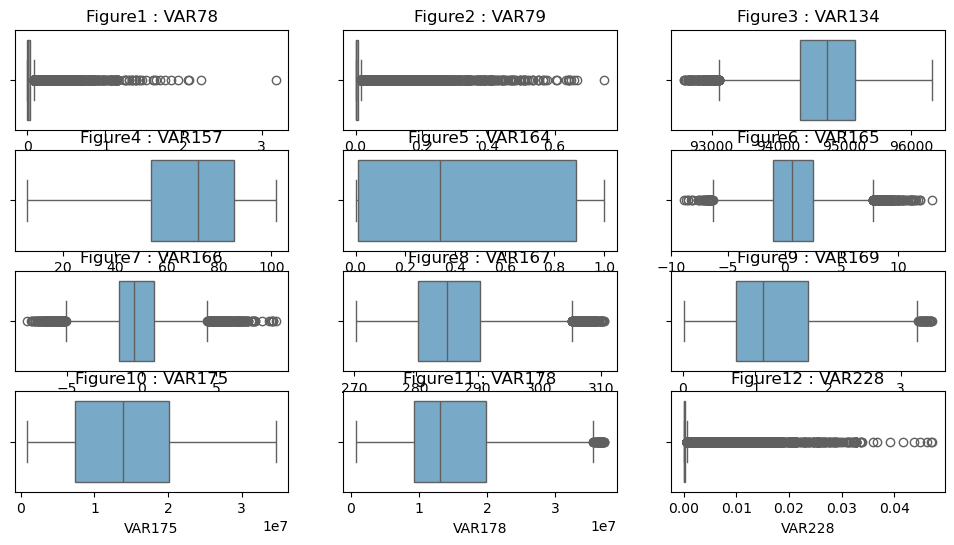

In [17]:
fig, ax = plt.subplots(n_rows, n_cols, figsize = (12,6))
for r in range(n_rows):
    for c in range(n_cols) :
        i = r*n_cols + c
        if i < len(features) :
            ax_i = ax[r,c]
            ax_i = sns.boxplot(df, x = features[i], palette = "Blues" ,ax = ax_i)
            ax_i.set_title(f"Figure{i+1} : {features[i]}")
plt.show()

In [18]:
df1 = pd.read_csv(path)

In [19]:
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP'],format='%Y%m%d %H:%M')
df1.drop('ZONEID', axis = 1, inplace = True)
df1.head()

,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


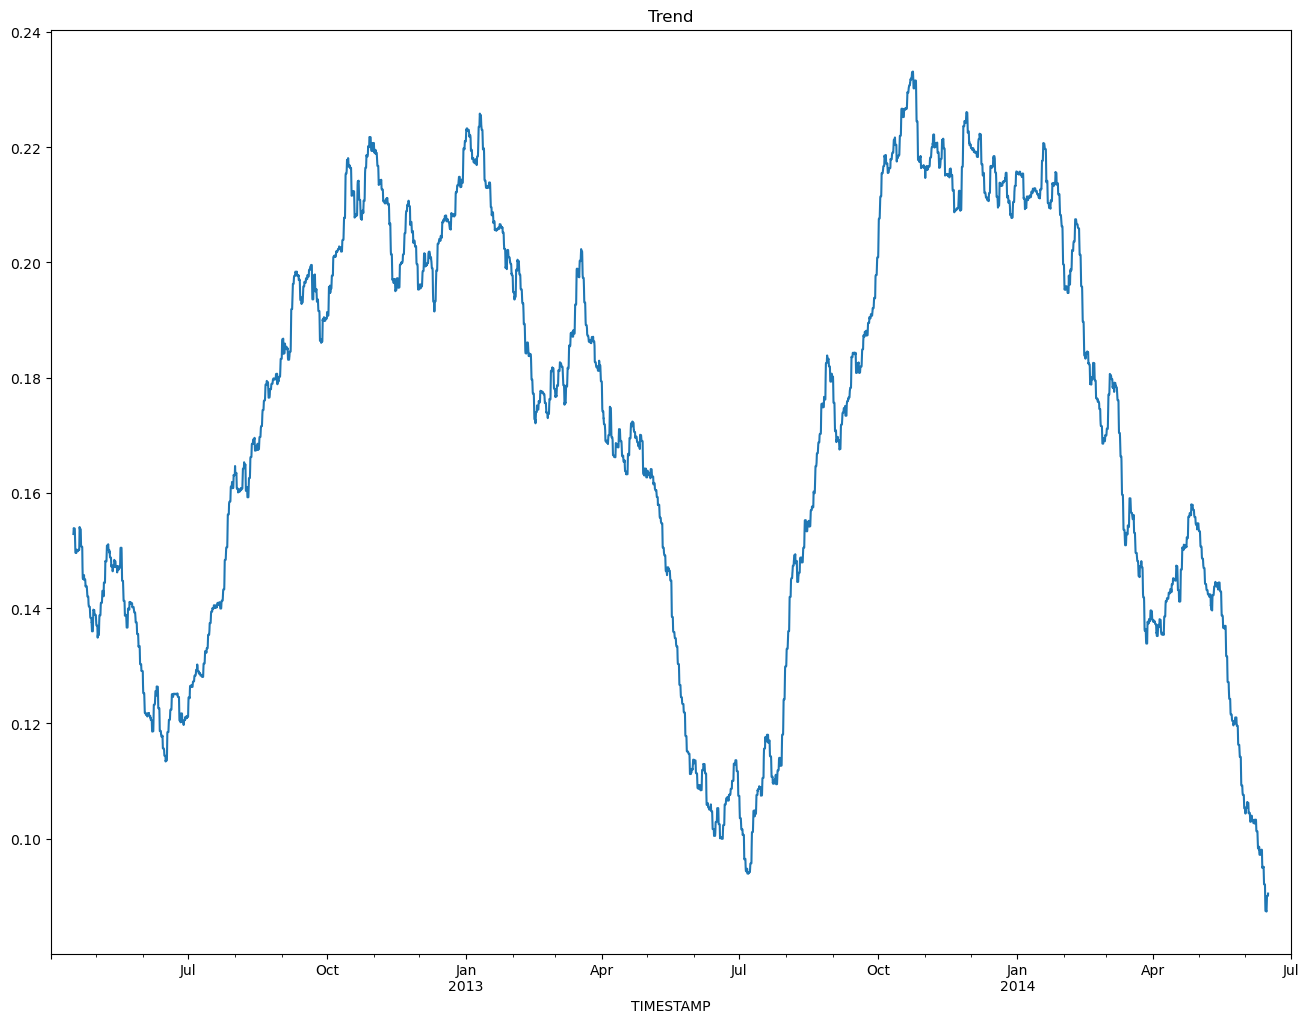

In [20]:
df1['Year'] = df1['TIMESTAMP'].dt.year
df1['Month'] = df1['TIMESTAMP'].dt.month
#tính trung bình power theo tháng và năm
from statsmodels.tsa.seasonal import seasonal_decompose
#tạo chuỗi thời gian cho phân tích mùa vụ
time_series = df1.set_index('TIMESTAMP')['POWER']
result = seasonal_decompose(time_series, model='additive', period=24*30)
fig, ax = plt.subplots(1,1,figsize=(16,12))
result.trend.plot(ax = ax)
ax.set_title('Trend') # tính xu hướng
plt.show()

### Chuẩn bị dữ liệu để train mô hình

**Chuẩn hóa dữ liệu**

In [21]:
df2 = df.copy()

In [22]:
sc = StandardScaler()
df2[features] = sc.fit_transform(df2[features])
df2.head()

,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
TIMESTAMP,,,,,,,,,,,,,
2012-04-01 01:00:00,-0.323311,-0.249117,0.190225,-0.410661,-0.469727,0.066230,-1.157018,1.223827,-1.459900,-1.635942,-1.625069,-0.291038,0.754103
2012-04-01 02:00:00,-0.293052,0.331489,0.048200,-0.687051,0.059961,0.583234,-1.418282,1.392565,-1.042780,-1.476210,-1.188622,-0.291038,0.555000
2012-04-01 03:00:00,-0.083916,2.238687,0.006556,-0.357162,0.843245,0.890171,-0.879654,1.224683,-0.657575,-1.317716,-0.765998,0.108265,0.438397
2012-04-01 04:00:00,0.146188,1.824760,-0.041097,-0.034049,1.327825,0.806448,-0.593775,1.057314,-0.366500,-1.158505,-0.427804,0.453891,0.145449
2012-04-01 05:00:00,0.093961,3.353763,-0.089267,0.085501,1.274996,0.625597,-0.838068,0.983168,-0.173938,-0.987392,-0.177056,0.700970,0.111987


In [23]:
### Tạo dữ liệu timeseries
def create_sequences(data, window_size, prediction_horizon):
    X, y = [], []
    for i in range(len(data) - window_size - prediction_horizon + 1):
        X.append(data[i:(i + window_size), :])
        y.append(data[(i + window_size):(i + window_size + prediction_horizon), -1])  # Dự đoán 24 giá trị POWER tiếp theo
    return np.array(X), np.array(y)

In [24]:
x,y = create_sequences(df2.values, window_size = 150 , prediction_horizon = 150)
print(f"Cấu trúc dữ liệu của farm1 : {x.shape}, {y.shape}")

Cấu trúc dữ liệu của farm1 : (19405, 150, 13), (19405, 150)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15524, 150, 13)
(15524, 150)
(3881, 150, 13)
(3881, 150)


In [31]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

# Xây dựng mô hình LSTM
model = Sequential()
# Thêm lớp LSTM đầu tiên
model.add(LSTM(50, activation='relu', input_shape=(150, 13), return_sequences=True))
model.add(Dropout(0.2))

# Thêm lớp LSTM thứ hai
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))

# Thêm lớp đầu ra
model.add(Dense(150))  # Dự đoán 150 giá trị
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 150, 50)        │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 150, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │         7,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,650 (158.79 KB)

 Trainable params: 40,650 (158.79 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [33]:
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 47s 89ms/step - loss: 0.0509 - val_loss: 0.0137
Epoch 2/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - loss: 0.0169 - val_loss: 0.0136
Epoch 3/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - loss: 0.0155 - val_loss: 0.0124
Epoch 4/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - loss: 0.0147 - val_loss: 0.0125
Epoch 5/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - loss: 0.0144 - val_loss: 0.0118
Epoch 6/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - loss: 0.0140 - val_loss: 0.0116
Epoch 7/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - loss: 0.0137 - val_loss: 0.0112
Epoch 8/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - loss: 0.0135 - val_loss: 0.0111
Epoch 9/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - loss: 0.0133 - val_loss: 0.0108
Epoch 10/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - loss: 0.0132 - val_loss: 0.0109
Epoch 11/20
486/486 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - loss: 0.0131 - val_loss: 0.0108
Epoch 12/20
486/486 ━━━━━━━━━━

In [34]:
#tính toán các metrics
y_pred = model.predict(x_test)
print(y_pred.shape)

122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step
(3881, 150)


In [35]:
#tính toán các metrics
print("============================================")
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Các chỉ số của farm1: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("============================================")

Các chỉ số của farm1: 
Mean Absolute Error (MAE): 0.05622665174170263
Mean Squared Error (MSE): 0.010024042882590787
Root Mean Squared Error (RMSE): 0.10012014224216217
R-squared (R²): 0.8508285205952594


122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


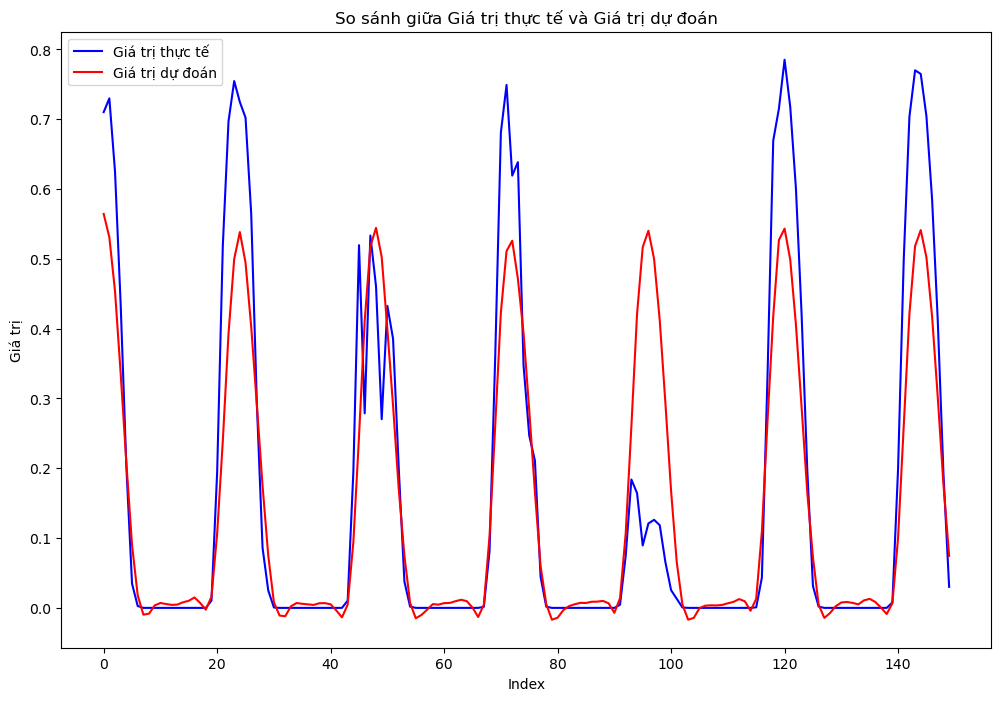

In [36]:
y_pred1 = model.predict(x_test)
# Vẽ biểu đồ line
plt.figure(figsize=(12, 8))
plt.plot(y_test[140], label='Giá trị thực tế', color='blue')
plt.plot(y_pred1[140], label='Giá trị dự đoán', color='red')
plt.xlabel('Index')
plt.ylabel('Giá trị')
plt.title('So sánh giữa Giá trị thực tế và Giá trị dự đoán')
plt.legend()
plt.show()